Connect to the UCI ML Repository

In [ ]:
pip install ucimlrepo

Fetch the adult dataset and get some information on it. 

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

Based on what is shown above, most of the variables of this dataset are categorical since they reflect demographic categories. The rest, such as capital gain, capital loss, and hours per week, are numerical.  

Display the features (X) dataframe. 

In [3]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


Display the target (y) dataframe. This depicts the binary class that is predicted, <=50K income and >50K income. 

In [4]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


Figure out the class balance of this dataset. 

In [5]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Based on this, there are many more <=50 K income samples than >50K income samples. However, there are is an unnecessary period that should be removed as shown below. 

In [6]:
y['income'] = y['income'].str.replace('.', '', regex=False)

C:\Users\alfre_g2qn6y7\AppData\Local\Temp\ipykernel_18032\2974756502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.replace('.', '', regex=False)


In [7]:
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

Install scikit-learn. 

In [ ]:
   pip install scikit-learn

Install matplotlib

In [ ]:
pip install matplotlib

Display stacked barcharts showing the proportion of each class for each of the categorical variables. 

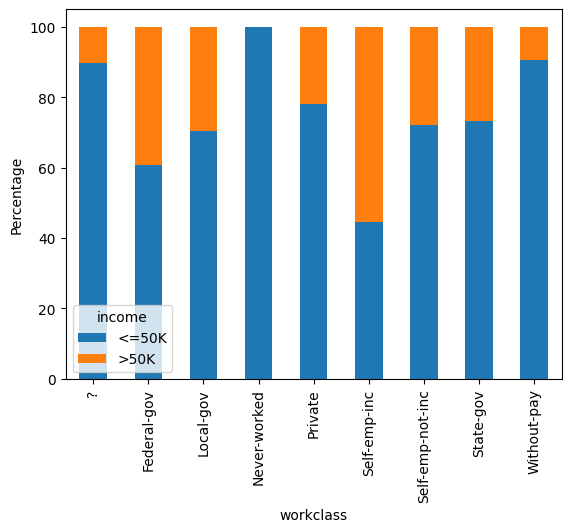

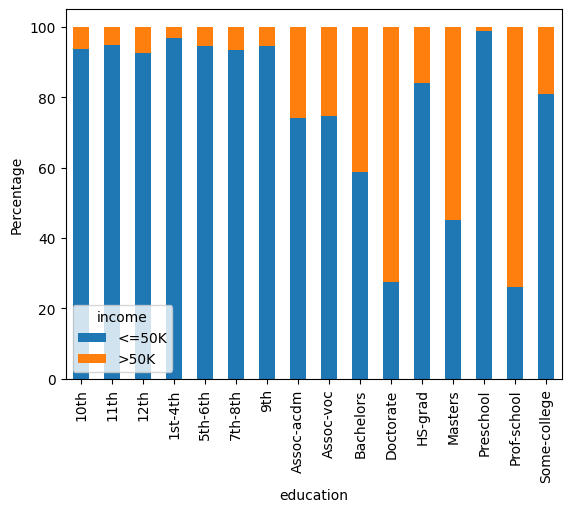

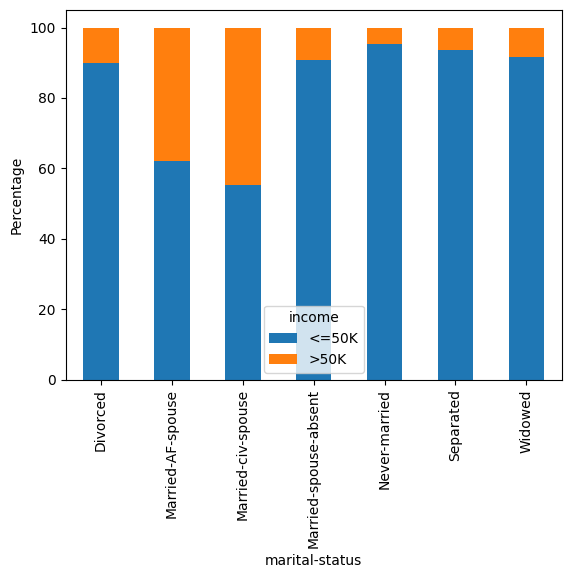

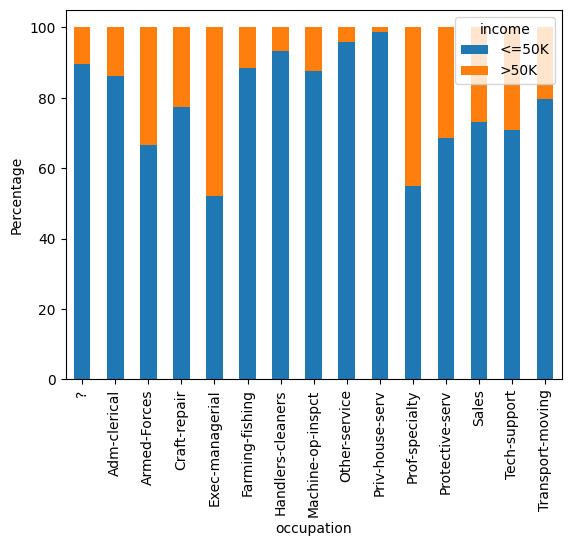

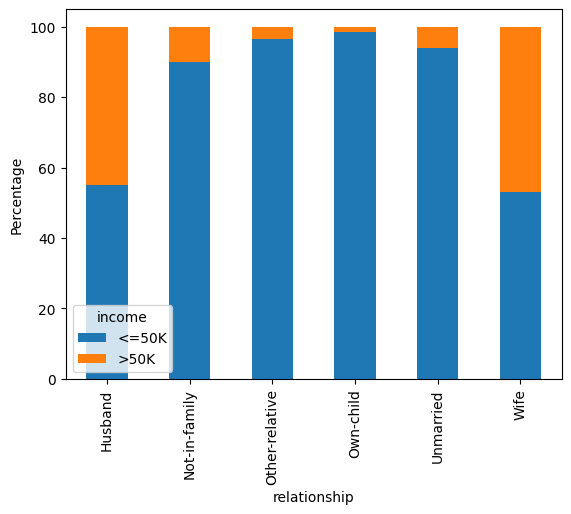

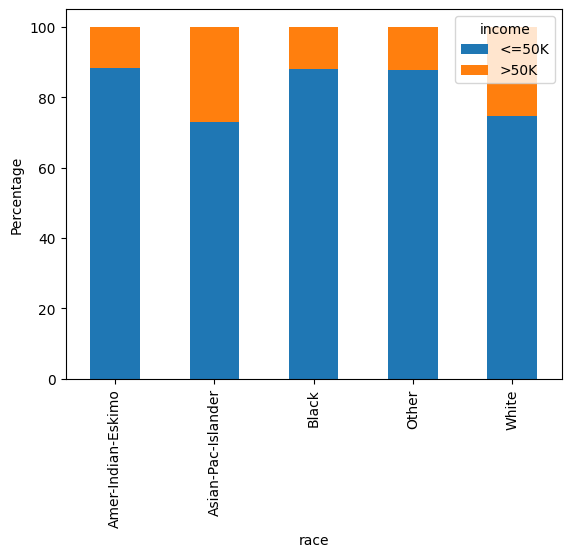

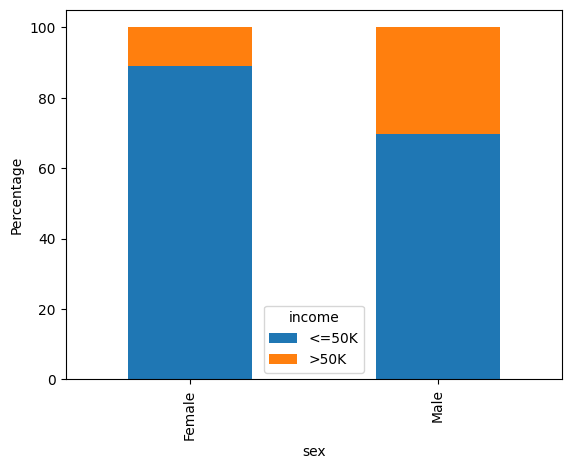

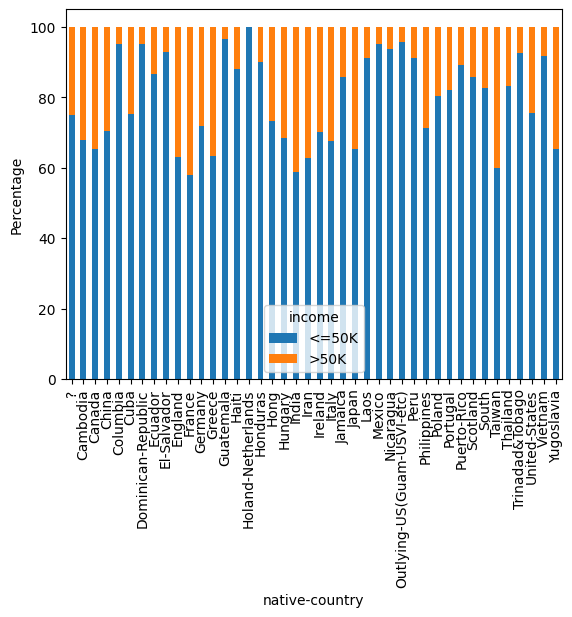

In [11]:
import matplotlib.pyplot as plt
import pandas as pd 
for column in X.columns:
    if X[column].dtype == "object":
        A = pd.crosstab(X[column],y["income"])
        A_percent = A.div(A.sum(axis=1), axis=0) * 100
        A_percent.plot(kind='bar',stacked=True)
        plt.ylabel("Percentage")



Based on this, the <= 50K income class is more predominant generally. Exceptions to this rule include self-employed workers and those with either a doctorate or a masters degree. 

Encode all categorical variables as shown below. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == "object":
        X[column] = label_encoder.fit_transform(X[column])


Confirm that encoding has happened. 

In [13]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39
48838,64,9,321403,11,9,6,15,2,2,1,0,0,40,39
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39


Import RandomForestClassifier and drop the fnlwgt column since it is irrelevant. 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
model = RandomForestClassifier()
X.drop('fnlwgt',axis=1,inplace=True)




C:\Users\alfre_g2qn6y7\AppData\Local\Temp\ipykernel_18032\213845884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('fnlwgt',axis=1,inplace=True)


Train the model and get accuracy results and the classification report. 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8464530658204524

In [16]:
report = classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7414
        >50K       0.71      0.61      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



It is evident that accuracy, precision, recall, and f1-scores are well above 50%. However, the >50K class has substantially lower scores for all of these, something that is not a complete surprise given how the dataset is tilted in favor of the other class.  

Do cross-validation. 

In [17]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-validation scores for each fold: {scores}")
print(f"Average cross-validation score: {np.mean(scores):.4f}")

c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\s

Cross-validation scores for each fold: [0.84686252 0.85167366 0.84817772 0.85104423 0.8478706 ]
Average cross-validation score: 0.8491


In [18]:
from sklearn.model_selection import KFold, cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=kf)
report = classification_report(y, y_pred)
print(report)


c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\s

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90     37155
        >50K       0.71      0.62      0.66     11687

    accuracy                           0.85     48842
   macro avg       0.80      0.77      0.78     48842
weighted avg       0.84      0.85      0.85     48842



Cross validation scores largely confirm what is seen above. 

Train the Gradient Boosting model and get results. 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
model = GradientBoostingClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8632408639574163

In [20]:
report = classification_report(y_test,prediction)
print(report)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7414
        >50K       0.80      0.58      0.67      2355

    accuracy                           0.86      9769
   macro avg       0.84      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



The scores are similar to those of Random Forest. It is noteworthy that while the precision score for the >50K class improved, the recall score dipped. 

Do cross-validation. 

In [21]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-validation scores for each fold: {scores}")
print(f"Average cross-validation score: {np.mean(scores):.4f}")

c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-package

Cross-validation scores for each fold: [0.86324086 0.86815437 0.86844799 0.86373874 0.86783374]
Average cross-validation score: 0.8663


In [22]:
from sklearn.model_selection import KFold, cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=kf)
report = classification_report(y, y_pred)
print(report)

c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alfre_g2qn6y7\AppData\Local\Programs\Python\Python312\Lib\site-package

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92     37155
        >50K       0.79      0.60      0.68     11687

    accuracy                           0.87     48842
   macro avg       0.84      0.77      0.80     48842
weighted avg       0.86      0.87      0.86     48842



Results largely confirm the above. 

Calculate feature importance of the model. 

In [23]:
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,relationship,0.358158
9,capital-gain,0.218663
3,education-num,0.203893
0,age,0.062240
10,capital-loss,0.060990
11,hours-per-week,0.034898
4,marital-status,0.029035
5,occupation,0.021113
1,workclass,0.005765
8,sex,0.003406


Based on this, the top three most important features in the model are relationship, capital_gain, and education_num (number representing education level). 